<a href="https://colab.research.google.com/github/YorkJong/vistock/blob/main/notebooks/vistock_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### vistock -- an open source package that provides a lot of plot() functions to visualize stocks.

### Install vistock from GitHub (免費版Colab會固定時間清掉安裝的東西，所以重安裝是新連線後最先要做的事)

In [1]:
%pip install git+https://github.com/YorkJong/vistock.git

  Cloning https://github.com/YorkJong/vistock.git to /tmp/pip-req-build-zajznfrw
  Running command git clone --filter=blob:none --quiet https://github.com/YorkJong/vistock.git /tmp/pip-req-build-zajznfrw
  Resolved https://github.com/YorkJong/vistock.git to commit 8c8b1b69d0fa9067ec1163f33f9cb391835042bc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00
  Created wheel for vistock: filename=vistock-0.2.5-py3-none-any.whl size=22979 sha256=daeb4f429d1ab3d762586a28c08eececd7dc884ebf6948ab106f69db27abb51c
  Stored in directory: /tmp/pip-ephem-wheel-cache-wxletiyc/wheels/11/d0/ab/74a0ef21cb422317e943a3f7a0788132f3fce8f3fcd683438f
Successfully built vistock


### Install TA-Lib optionally used only by vistock.mpl.rsi module (安裝較費時，沒要看RSI 技術指標可以不裝)

In [2]:
import sys
import platform

if 'google.colab' in sys.modules:       # Colab
    !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
    !tar -xzvf ta-lib-0.4.0-src.tar.gz
    %cd ta-lib
    !./configure --prefix=/usr
    !make
    !make install
elif platform.system() == "Darwin":     # macOS
    !brew install ta-lib

%pip install Ta-Lib

--2024-07-13 12:14:30--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-07-13 12:14:30--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-07-13 12:14:30--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1
Res

References:
* [Installation of Ta-Lib in Python: A Complete Guide for all Platforms](https://blog.quantinsti.com/install-ta-lib-python/)

### Usage Explanation

#### Parameters

kind (圖種類):
* To select a kind of from charts

symbol (股票代碼):
* The symbol of a stock (e.g., TSLA)
* This also suport some to crypto to USD pairs (e.g., BTC-USD, ETH-USD)

period (整張圖的繪製區間):
* the period of data to download

interval (每筆k線資料的間隔):
* the interval of an OHLC data item

legend_location （圖例說明匡的位置）:
* the loacation of the legend

total_bins （價量累積直方圖中價格區間分組數量）:
* the total bins on a Price by Volume chart (so-called Volume Profile)

#### Colab Forms
* Forms provide an easy way to parameterize code.
* Forms are Google Colab specific features extending from the original Jupyter Notebooks.
* After running a cell manually, it will auto-run if you change the selected value.


### Plot with mplfinance

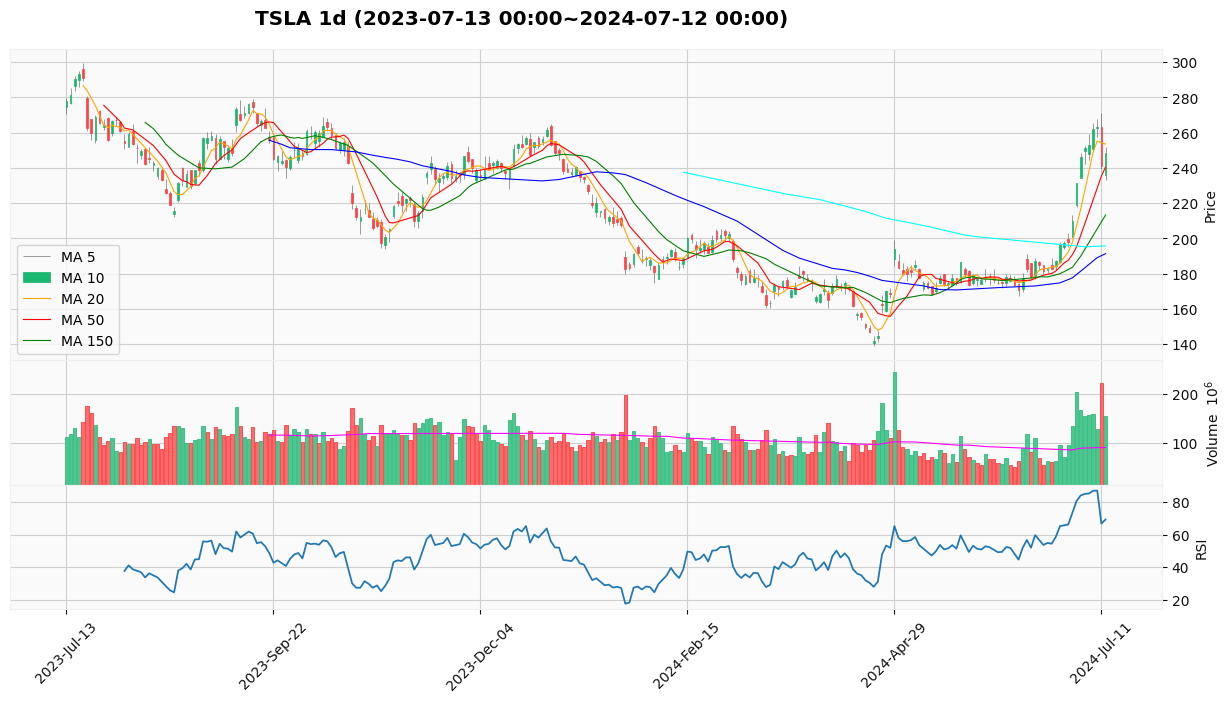

In [3]:
#@title Interval of Inter Days { run: "auto", display-mode: "form" }
kind = "Price, Volume, RSI" #@param ["Price, Volume, RSI", "Price by Volume"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "1y" #@param ["3mo", "6mo", "1y", "2y", "5y", "max"]
interval = "1d" #@param ["1d", "5d", "1wk", "1mo"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}

import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,
    'Price by Volume': vsm.pbv,
}

module = tbl[kind]
if module == vsm.pbv:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location, total_bins=total_bins)
else:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location)


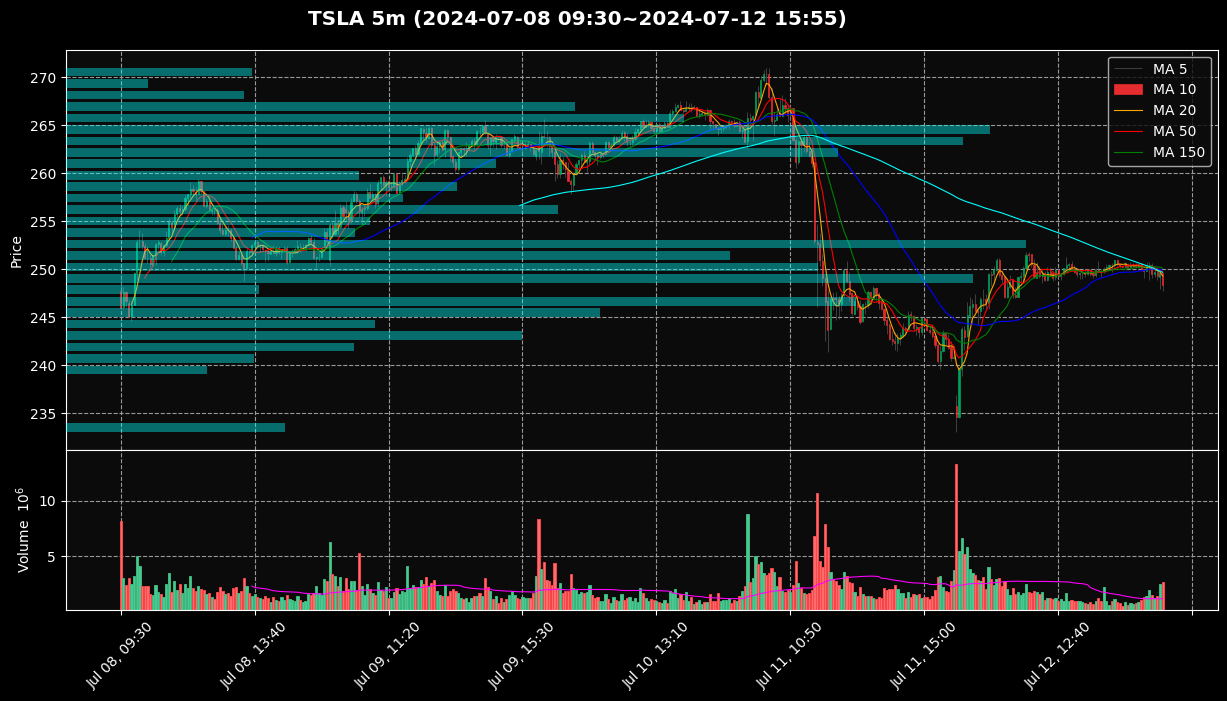

In [4]:
#@title Interval of Intra Day { run: "auto", display-mode: "form" }
kind = "Price by Volume"  #@param ["Price, Volume, RSI", "Price by Volume"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "5d" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = "5m" #@param ["2m", "5m", "15m", "30m", "60m", "90m", "1h"]
legend_location = "best" #@param ["best", "upper right", "upper left", 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']
total_bins = 33 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}

import vistock.mpl as vsm

tbl = {
    'Price, Volume, RSI': vsm.rsi,
    'Price by Volume': vsm.pbv,
}

module = tbl[kind]
if module == vsm.pbv:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location, total_bins=total_bins)
else:
    module.plot(symbol, period=period, interval=interval,
                legend_loc=legend_location)

### Plot with Plotly

In [5]:
#@title Interval of Inter Days { run: "auto", display-mode: "form" }
kind = "Price by Volume with 2 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
symbol = "\u53F0\u7A4D\u96FB" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "2y" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = "1mo" #@param ["1d", "5d", "1wk", "1mo"]
total_bins = 42 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,
    'Price and Volume Separated': vsp.pv2s,
    'Price by Volume with 4 Subplots': vsp.pbv4s,
    'Price by Volume with 2 Subplots': vsp.pbv2s,
}

module = tbl[kind]
if module in (vsp.pbv4s, vsp.pbv2s):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval,
                hides_nontrading=hides_nontrading)

In [6]:
#@title Interval of Intra Day { run: "auto", display-mode: "form" }
kind = "Price by Volume with 2 Subplots" #@param ["Price and Volume Overlaid", "Price and Volume Separated", "Price by Volume with 4 Subplots", "Price by Volume with 2 Subplots"]
symbol = "TSLA" #@param ["TSLA", "MSFT", "AAPL", "GOOG", "TQQQ", "SOXL", "TSM", "台積電", "2330", "元太", "BTC-USD", "ETH-USD"] {allow-input: true}
period = "5d" #@param ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
interval = "1h" #@param ["2m", "5m", "15m", "30m", "60m", "90m", "1h"]
total_bins = 28 #@param ["8", "28", "33", "42", "58", "69"] {type:"raw", allow-input: true}
hides_nontrading = True #@param {type:"boolean"}

import vistock.plotly as vsp

tbl = {
    'Price and Volume Overlaid': vsp.pv1s,
    'Price and Volume Separated': vsp.pv2s,
    'Price by Volume with 4 Subplots': vsp.pbv4s,
    'Price by Volume with 2 Subplots': vsp.pbv2s,
}

module = tbl[kind]
if module in (vsp.pbv4s, vsp.pbv2s):
    module.plot(symbol, period=period, interval=interval, total_bins=total_bins,
                hides_nontrading=hides_nontrading)
else:
    module.plot(symbol, period=period, interval=interval,
                hides_nontrading=hides_nontrading)

In [7]:
from vistock import tw

tw.similar_stocks('印度')

[('富邦印度', '00652'), ('富邦印度正2', '00653L'), ('富邦印度反1', '00654R')]

In [8]:
print(tw.as_yfinance('2330'))
print(tw.as_yfinance('元太'))
tw.as_yfinance('星宇航空')

2330.TW


ChunkedEncodingError: ('Connection broken: IncompleteRead(3890874 bytes read, 791532 more expected)', IncompleteRead(3890874 bytes read, 791532 more expected))